In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(f'# of nulls: {titanic_df.isnull().sum().sum()}')

# of nulls: 0


In [13]:
print(f'Sex value\'s distribution:\n', titanic_df['Sex'].value_counts())
print(f'Cabin value\'s distribution:\n', titanic_df['Cabin'].value_counts())
print(f'Embarked value\'s distribution:\n', titanic_df['Embarked'].value_counts())

Sex value's distribution:
 male      577
female    314
Name: Sex, dtype: int64
Cabin value's distribution:
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
D50              1
C50              1
B37              1
E49              1
C54              1
Name: Cabin, Length: 148, dtype: int64
Embarked value's distribution:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [16]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [23]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

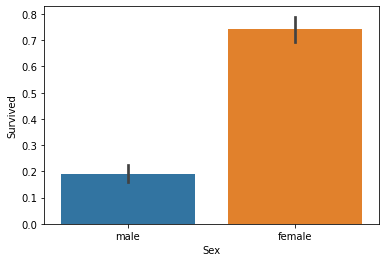

In [25]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

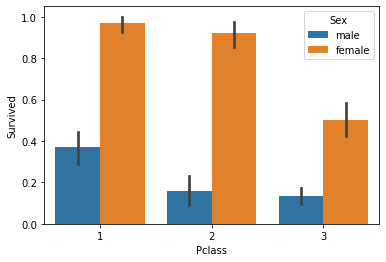

In [27]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [29]:
def get_category(age):
    if age <= -1: return 'Unknown'
    elif age <= 5: return 'Baby'
    elif age <= 12: return 'Child'
    elif age <= 18: return 'Teenager'
    elif age <= 25: return 'Student'
    elif age <= 35: return 'Young Adult'
    elif age <= 60: return 'Adult'
    else: return 'Elderly'


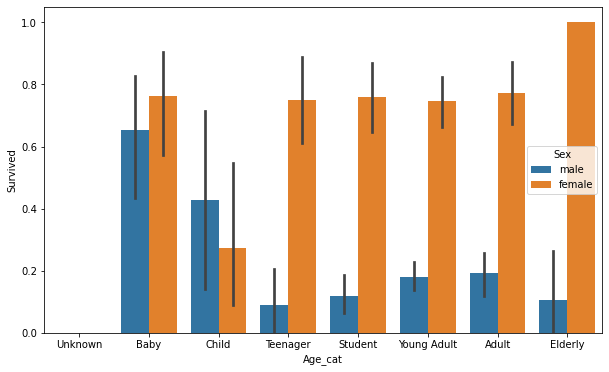

In [32]:
plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [33]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [36]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [37]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier\'s accuracy: {accuracy_score(y_test, dt_pred): .4f}')

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier\'s accuracy: {accuracy_score(y_test, rf_pred): .4f}')

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression\'s accuracy: {accuracy_score(y_test, lr_pred): .4f}')

DecisionTreeClassifier's accuracy:  0.7877
RandomForestClassifier's accuracy:  0.8547
LogisticRegression's accuracy:  0.8492


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test, = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test, = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'cross validation {iter_count} accuracy: {accuracy: .4f}')

    mean_score = np.mean(scores)
    print(f'mean accuracy: {mean_score: .4f}')

exec_kfold(dt_clf, folds=5)

cross validation 0 accuracy:  0.7542
cross validation 1 accuracy:  0.7809
cross validation 2 accuracy:  0.7865
cross validation 3 accuracy:  0.7697
cross validation 4 accuracy:  0.8202
mean accuracy:  0.7823


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f'cross validation #{iter_count} accuracy: {accuracy: .4f}')

print(f'mean accuracy: {np.mean(scores): .4f}')

cross validation #0 accuracy:  0.7430
cross validation #1 accuracy:  0.7753
cross validation #2 accuracy:  0.7921
cross validation #3 accuracy:  0.7865
cross validation #4 accuracy:  0.8427
mean accuracy:  0.7879


In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('best_params: ', grid_dclf.best_params_)
print('accuracy: ', f'{grid_dclf.best_score_: .4f}')
best_dclf = grid_dclf.best_estimator_

predictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'accuracy on test_data: {accuracy: .4f}' )

best_params:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
accuracy:   0.7992
accuracy on test_data:  0.8715
